# Цель лабораторной работы

Изучение линейных моделей, SVM и деревьев решений

# Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
    * одну из линейных моделей;
    * SVM;
    * дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

# Дополнительное задание

1. Проведите эксперименты с важностью признаков в дереве решений;
2. Визуализируйте дерево решений.

# Ход выполнения лабораторной работы

Подключим необходимые библиотеки и загрузим датасет

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

%matplotlib inline

sns.set(style="ticks")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

pd.set_option("display.width", 70)

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Как видим, пустых значений нет, значет нет необходимости преобразовывать набор данных

In [4]:
X = data.drop("target", axis=1)
y = data["target"]
print(X, "\n")
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0     63    1   3       145   233    1        0      150      0   
1     37    1   2       130   250    0        1      187      0   
2     41    0   1       130   204    0        0      172      0   
3     56    1   1       120   236    0        1      178      0   
4     57    0   0       120   354    0        1      163      1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...   
298   57    0   0       140   241    0        1      123      1   
299   45    1   3       110   264    0        1      132      0   
300   68    1   0       144   193    1        1      141      0   
301   57    1   0       130   131    0        1      115      1   
302   57    0   1       130   236    0        0      174      0   

     oldpeak  slope  ca  thal  
0        2.3      0   0     1  
1        3.5      0   0     2  
2        1.4      2   0     2  
3        0.8      2   0     2  
4        0.6      2   0     2  
.. 

In [5]:
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (227, 13)
X_test: (76, 13)
y_train: (227,)
y_test: (76,)


In [7]:
def test_model(model):
    print("f1_score:",
          f1_score(y_test, model.predict(X_test)))
    print("precision_score:",
          precision_score(y_test, model.predict(X_test)))

#### Линейная модель — SGDClassifier

In [8]:
SGD = SGDClassifier(max_iter=10000)
SGD.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
test_model(SGD)

f1_score: 0.8148148148148149
precision_score: 0.825


#### SVM

In [10]:
SVC = SVC(kernel='rbf')
SVC.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
test_model(SVC)

f1_score: 0.8275862068965518
precision_score: 0.782608695652174


#### Дерево решений

In [12]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [13]:
test_model(DT)

f1_score: 0.72
precision_score: 0.7941176470588235


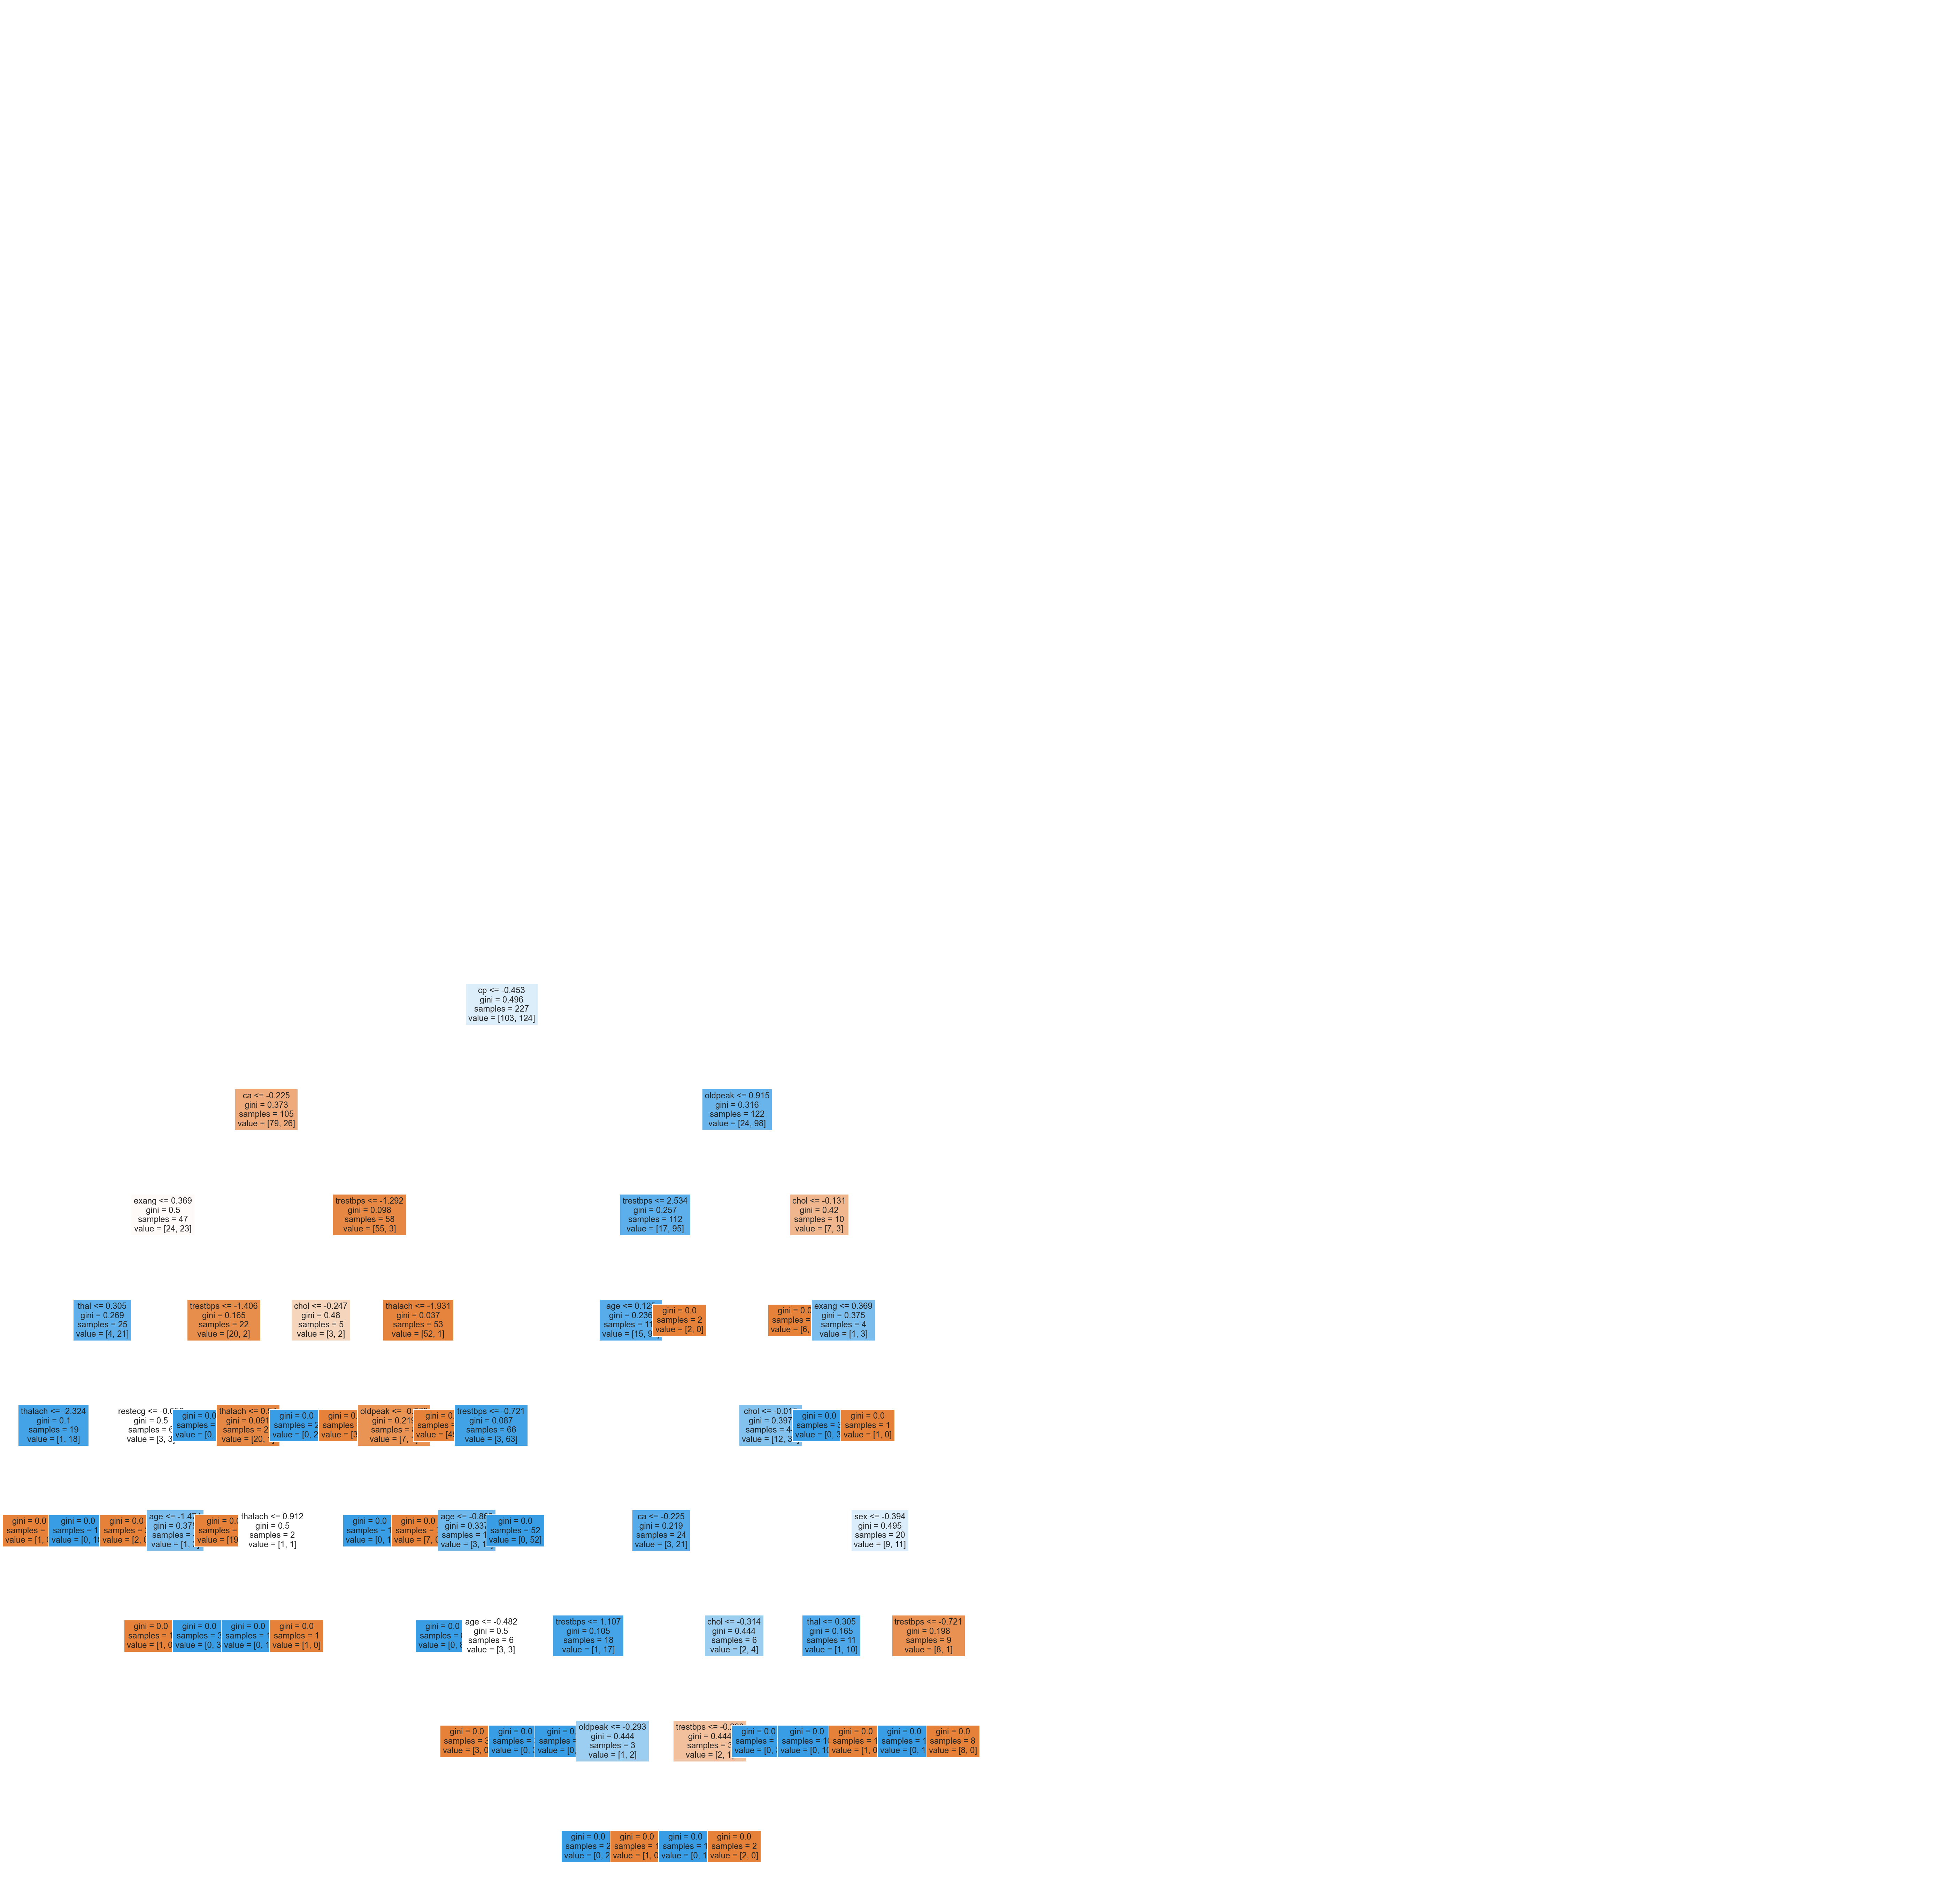

In [14]:
fig, ax = plt.subplots(figsize=(50, 50))
plot_tree(DT, ax=ax, filled='true', fontsize=12, feature_names=data.columns)
plt.savefig('tree_high_dpi', dpi=100)

Как видим, метод опорных векторов показал лучший результат